<a href="https://colab.research.google.com/github/phurisk/BSC_DPDM23/blob/main/Internet_usage_behavior_in_Thailand_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Internet usage behavior in Thailand

Link to Data: https://data.go.th/dataset/dataset_25_02?fbclid=IwAR3fip4rhRVHIEnfSP00ox2DddICf_dKYy1hheuEcg5v7IfC4cFJ575Ir_c

Link Data เพิ่มเติม : https://opendata.etda.or.th/eu/dataset/dataset_25_02/resource/fb003566-bfe7-44df-979a-21fd68e9554d?fbclid=IwAR3RYnBtg3tlRhOMQHbDGyVVqw-kqjNjA5N-FnVKg7623era1MtV0bzN1mE

### แบบสอบถาม 18 ข้อ ที่ใช้ในชุดข้อมูล



- ท่านเคยพบเห็นข่าวปลอม (Fake News) บนโลกออนไลน์หรือไม่

- ใช้ Social Media เช่น Facebook, Twitter, Instagram

- ใช้แอปพลิเคชันถ่ายทอดสด เช่น Facebook Live, Instagram Live ,YouTube live

- เล่นเกมออนไลน์

- รับ-ส่งอีเมล

- ค้นหาข้อมูล (Search Engine) เช่น ค้นหาข้อมูลใน Google/Bing

- เรียนออนไลน์ (e-Learning)

- หางาน/สมัครงานทางออนไลน์

- ซื้อขายสินทรัพย์เพื่อการลงทุน เช่น หุ้น กองทุนรวม

- ติดต่อสื่อสารออนไลน์ ทั้งการโทรศัพท์ และพูดคุย (Chat)

- ขายสินค้าและบริการออนไลน์

- ดาวน์โหลดซอฟต์แวร์/เพลง/ละคร/ภาพยนตร์/เกม/ไอเทมในเกม

- ซื้อสินค้าและบริการออนไลน์

- ดูโทรทัศน์/ดูคลิป/ดูหนัง/ฟังเพลงออนไลน์

- อ่านข่าว/บทความ/หนังสืออิเล็กทรอนิกส์ (e-Book)

- ทำธุรกรรมทางการเงินออนไลน์

- ใช้งานบริการภาครัฐผ่านระบบออนไลน์ เช่น ชำระภาษีออนไลน์

- ทำงานผ่านระบบออนไลน์ ประชุมออนไลน์

- ซื้อประกันออนไลน์ เช่น ประกันCOVID19 ประกันสุขภาพ ประกันอุบัติเหตุ ฯลฯ

In [1]:
!pip install scikit-learn==1.4.0


In [2]:

!pip install -U imbalanced-learn


  Using cached scikit_learn-1.4.1.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.4.0
    Uninstalling scikit-learn-1.4.0:
      Successfully uninstalled scikit-learn-1.4.0


In [2]:
!pip show tensorflow
!pip show keras
!pip show scikit-learn

Name: tensorflow
Version: 2.15.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, setuptools, six, tensorboard, tensorflow-estimator, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine-rl
Name: keras
Version: 2.15.0
Summary: Deep learning for humans.
Home-page: https://keras.io/
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: 
Required-by: tensorflow
Name: scikit-learn
Version: 1.4.0
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: 

# Connect drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Necessary Imports

In [4]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

# Read, Prepare and Clean Data

In [5]:
import pandas as pd

df = pd.read_excel('/content/drive/Shareddrives/Internet Behavior/raw-data-iub-2563.xlsx')

df.head()

,fake_news,online_acitivity_1,online_acitivity_2,online_acitivity_3,online_acitivity_4,online_acitivity_5,online_acitivity_6,online_acitivity_7,online_acitivity_8,online_acitivity_9,online_acitivity_10,online_acitivity_11,online_acitivity_12,online_acitivity_13,online_acitivity_14,online_acitivity_15,online_acitivity_16,online_acitivity_17,online_acitivity_18
0,2,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,0,0
1,2,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
2,2,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0
3,2,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,0
4,2,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0


- ตรวจสอบค่าที่ไม่ใช่ตัวเลขในข้อมูล

In [6]:
non_numeric_values = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()

print(non_numeric_values)

fake_news              0
online_acitivity_1     0
online_acitivity_2     0
online_acitivity_3     0
online_acitivity_4     0
online_acitivity_5     0
online_acitivity_6     0
online_acitivity_7     0
online_acitivity_8     0
online_acitivity_9     0
online_acitivity_10    0
online_acitivity_11    0
online_acitivity_12    0
online_acitivity_13    0
online_acitivity_14    0
online_acitivity_15    0
online_acitivity_16    0
online_acitivity_17    0
online_acitivity_18    1
dtype: int64


- ลบ row ไม่ใช่ตัวเลข (เนื่องจากมีข้อมูลที่ผิดปกติไม่เกิน 5% ของข้อมูลทั้งหมด)

In [7]:
non_numeric_rows = df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().any(axis=1)
numeric_df = df[~non_numeric_rows]
numeric_df

,fake_news,online_acitivity_1,online_acitivity_2,online_acitivity_3,online_acitivity_4,online_acitivity_5,online_acitivity_6,online_acitivity_7,online_acitivity_8,online_acitivity_9,online_acitivity_10,online_acitivity_11,online_acitivity_12,online_acitivity_13,online_acitivity_14,online_acitivity_15,online_acitivity_16,online_acitivity_17,online_acitivity_18
0,2,1,0,1,1,1,1,0,0,1,0,1,1,1,1,0,1,0,0
1,2,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
2,2,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,0,0,0
3,2,1,0,1,1,1,0,0,0,1,0,0,0,0,1,1,1,1,0
4,2,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21644,2,1,1,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1
21645,2,1,0,0,1,1,0,1,0,1,0,1,1,1,1,1,0,0,0
21646,2,1,0,1,0,1,1,0,0,1,0,0,1,1,1,1,0,0,0
21647,2,1,0,0,1,1,0,0,1,1,1,1,1,1,1,1,0,0,0


- ตรวจสอบค่าผิดปกติอีกครั้ง

In [8]:
non_numeric_values = numeric_df.apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull().sum()

print(non_numeric_values)

fake_news              0
online_acitivity_1     0
online_acitivity_2     0
online_acitivity_3     0
online_acitivity_4     0
online_acitivity_5     0
online_acitivity_6     0
online_acitivity_7     0
online_acitivity_8     0
online_acitivity_9     0
online_acitivity_10    0
online_acitivity_11    0
online_acitivity_12    0
online_acitivity_13    0
online_acitivity_14    0
online_acitivity_15    0
online_acitivity_16    0
online_acitivity_17    0
online_acitivity_18    0
dtype: int64


- หาค่า missing value จากข้อมูลทั้งหมด

In [9]:
null_values = numeric_df.isnull().sum()

print(null_values)

fake_news              0
online_acitivity_1     0
online_acitivity_2     0
online_acitivity_3     0
online_acitivity_4     0
online_acitivity_5     0
online_acitivity_6     0
online_acitivity_7     0
online_acitivity_8     0
online_acitivity_9     0
online_acitivity_10    0
online_acitivity_11    0
online_acitivity_12    0
online_acitivity_13    0
online_acitivity_14    0
online_acitivity_15    0
online_acitivity_16    0
online_acitivity_17    0
online_acitivity_18    0
dtype: int64


In [10]:
data = numeric_df.copy()

# Data Visualization

<ipython-input-11-b0c9d91844b6>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = data.corr()


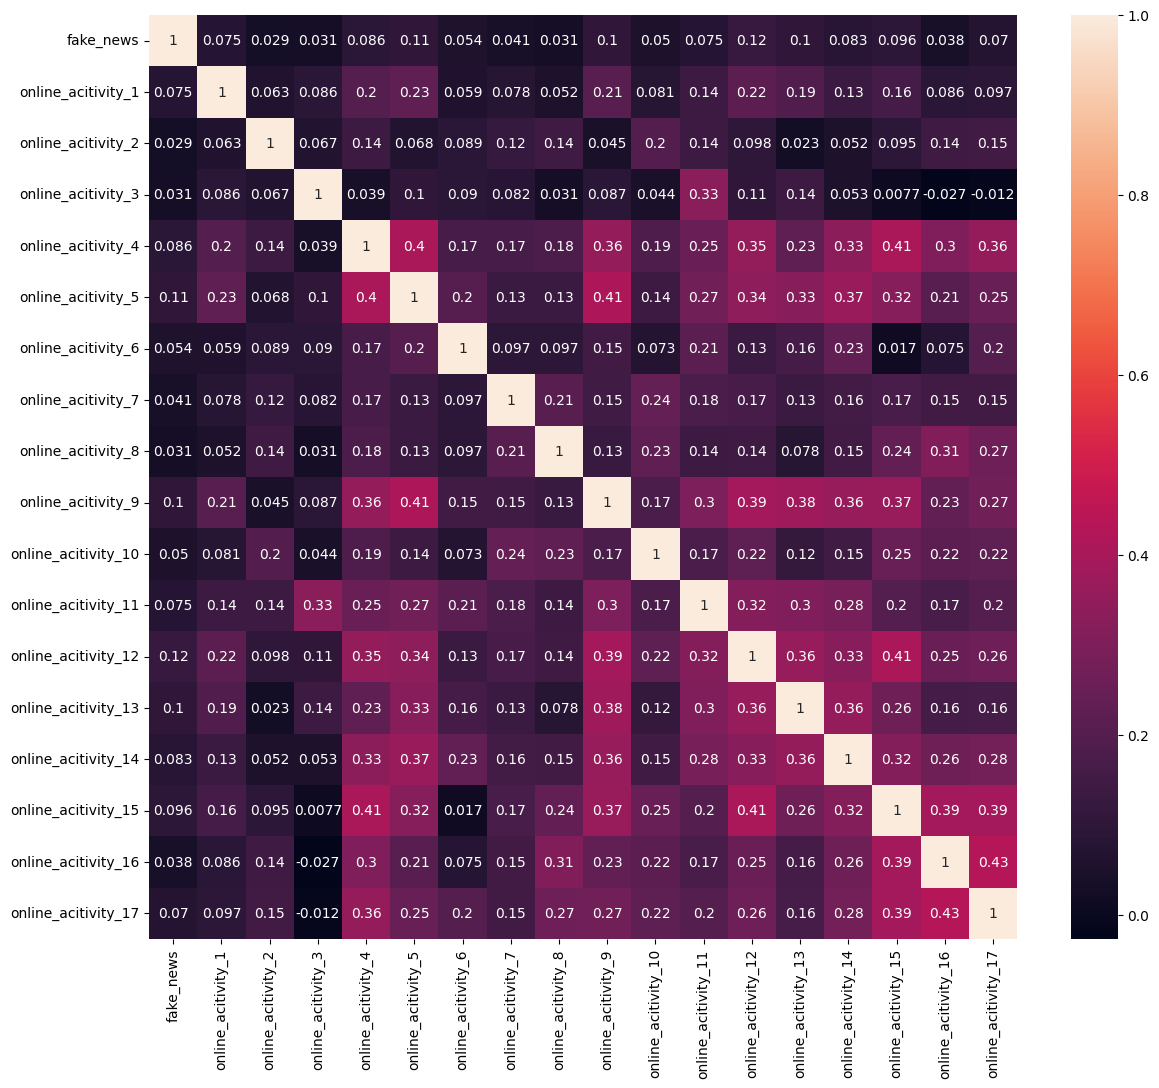

In [11]:
plt.figure(figsize=(14,12))
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# กำหนด Features และ Target varible (X,y)

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [13]:
# Features (X)
X = data.drop(columns=['fake_news'])  # คอลัมน์กิจกรรมออนไลน์ทั้งหมด

# Target variable (y)
y = data['fake_news']  # เลือกคอลัมน์ 'fake_news' เป็นตัวแปรเป้าหมาย


# จัดการ Imbalance data

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

## Method 1: Undersampling & Oversampling

- ปรับ train test เป็น 80% 20%

In [15]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# แบ่งข้อมูลออกเป็นชุด
X_train_OU, X_test_OU, y_train_OU, y_test_OU = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
from collections import Counter

# นับค่าที่ปรากฏซ้ำกันใน y_train_OU
count_y_train_OU = Counter(y_train_OU)

# นับค่าที่ปรากฏซ้ำกันใน y_test_OU
count_y_test_OU = Counter(y_test_OU)


print("Count of values in y_train_OU:")
print(count_y_train_OU)
print()

print("Count of values in y_test_OU:")
print(count_y_test_OU)
print()


Count of values in y_train_OU:
Counter({2: 16400, 1: 918})

Count of values in y_test_OU:
Counter({2: 4097, 1: 233})



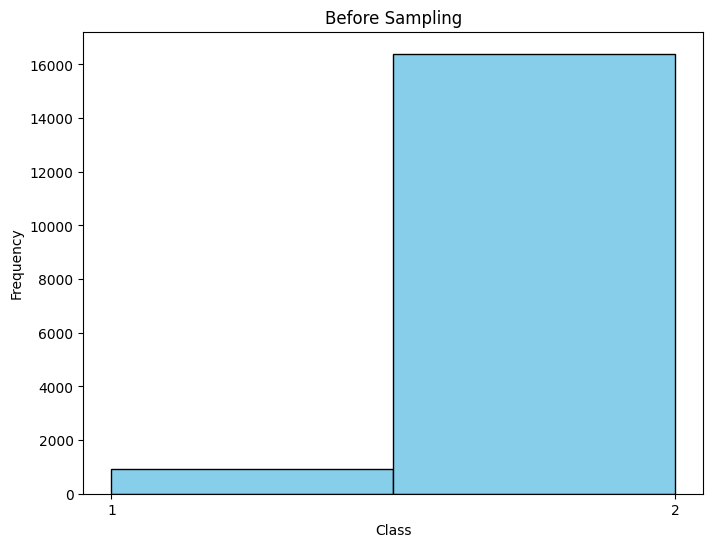

In [17]:
import matplotlib.pyplot as plt

# แสดง Histogram ของ y_train_OU ก่อนการทำ Over and Under Sampling
plt.figure(figsize=(8, 6))
plt.hist(y_train_OU, bins=2, color='skyblue', edgecolor='black')
plt.title('Before Sampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([1, 2])  # กำหนดแกน x เป็นคลาส 1 และ 2
plt.show()


### Oversampling



In [18]:
# Oversampling
oversampler = RandomOverSampler(random_state=0)
X_train_over, y_train_over = oversampler.fit_resample(X_train_OU, y_train_OU) #fit_resample ช่วยสร้างข้อมูลใหม่ในคลาส ที่มีข้อมูลน้อยกว่า และทำให้จำนวนข้อมูลในแต่ละคลาสเท่ากันหรือใกล้เคียงกัน

In [19]:
count_y_train_over = Counter(y_train_over)

print(count_y_train_over)
print()

Counter({2: 16400, 1: 16400})



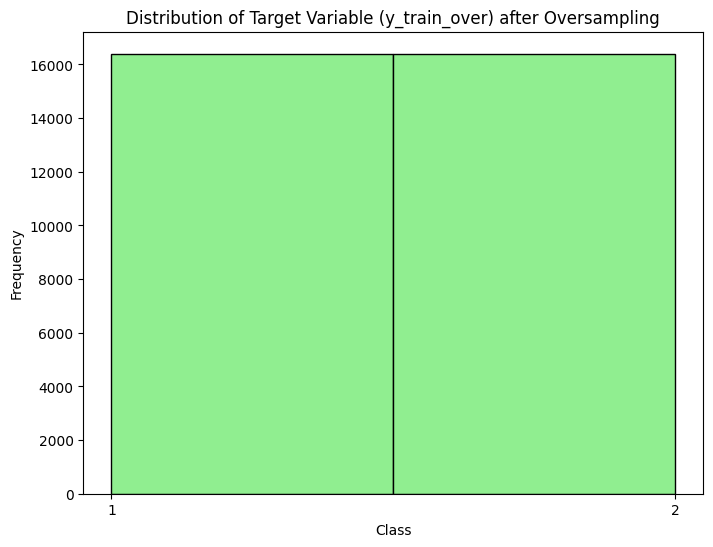

In [20]:
import matplotlib.pyplot as plt

# แสดง Histogram ของ y_train_over หลัง Oversampling
plt.figure(figsize=(8, 6))
plt.hist(y_train_over, bins=2, color='lightgreen', edgecolor='black')
plt.title('Distribution of Target Variable (y_train_over) after Oversampling')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([1, 2])  # กำหนดแกน x เป็นคลาส 1 และ 2
plt.show()


#### Train Model

In [21]:
# ฝึกโมเดล Decision Tree
tree_over = DecisionTreeClassifier(random_state=0)
tree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=0)

#### Cross Vallidatoin

In [22]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


# กำหนดจำนวน K ใน K-Fold Cross Validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=0)

# ประเมินโมเดลโดยใช้ Cross Validation
scores = cross_val_score(tree_over, X_test_OU, y_test_OU, cv=k_fold)

# แสดงค่าความแม่นยำของโมเดลจากทุก Fold
print('Cross Validation scores:', scores)

# คำนวณค่าเฉลี่ยของความแม่นยำจากทุก Fold
print('Average Cross Validation score:', scores.mean())



Cross Validation scores: [0.89491917 0.89722864 0.89722864 0.88452656 0.88683603]
Average Cross Validation score: 0.8921478060046188


#### Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
# ทำนายบนชุดข้อมูลทดสอบ
y_pred = tree_over.predict(X_test_OU)

In [25]:
cm = confusion_matrix(y_test_OU, y_pred)

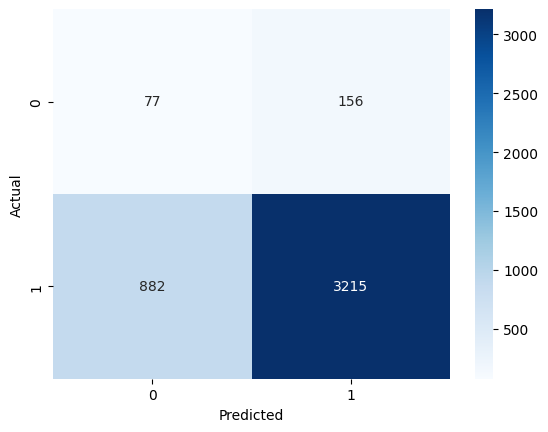

In [26]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


#### Eva

In [27]:
# วัดประสิทธิภาพของโมเดล
accuracy = accuracy_score(y_test_OU, y_pred)
precision = precision_score(y_test_OU, y_pred, average='binary')  # binary average สำหรับประสิทธิภาพของคลาสเดียว
recall = recall_score(y_test_OU, y_pred, average='binary')
f1 = f1_score(y_test_OU, y_pred, average='binary')

# แสดงค่าประสิทธิภาพของโมเดล
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.7602771362586606
Precision: 0.08029197080291971
Recall: 0.33047210300429186
F1 Score: 0.12919463087248323


In [29]:
# import matplotlib.pyplot as plt
# from sklearn.tree import plot_tree
# # สร้างรูปภาพของต้นไม้
# plt.figure(figsize=(20,10))
# plot_tree(tree_over, filled=True, feature_names=X_test_OU.columns, class_names=['0', '1'], proportion=True, rounded=True)
# plt.show()

In [30]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.tree import DecisionTreeClassifier

# # Define parameter grid
# param_grid = {
#     'max_depth': [2, 3, 4, 5, 6, 7 ],
#     'max_leaf_nodes' : [7, 9, 11, 13, 15, 17],
#     'min_samples_split': [ 3, 5, 7, 10],
#     'min_samples_leaf': [ 1, 3, 5, 7],
#     'max_features': [None, 'sqrt'],
#     'criterion': ['gini', 'entropy']
#     # ,    # 'random_state' : [1]
# }

# kf = KFold(n_splits=5, shuffle=True, random_state=0)

# # Perform grid search
# grid_search = GridSearchCV(tree_over, param_grid, cv=kf, scoring='accuracy')
# grid_search.fit(X_train_over, y_train_over)

# # Print the best parameters and score
# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)
# print('-'*50)

# # test decison tree
# best_param = grid_search.best_params_
# Dtree_grid_best = DecisionTreeClassifier(criterion = best_param['criterion'],
#                                          max_depth = best_param['max_depth'],
#                                          max_features = best_param['max_features'],
#                                          max_leaf_nodes = best_param['max_leaf_nodes'],
#                                          min_samples_leaf = best_param['min_samples_leaf'],
#                                          min_samples_split = best_param['min_samples_split']
#                                         #  ,random_state = best_param['random_state']
#                                          )

# Dtree_grid_best.fit(X_train_over, y_train_over)

# _, ax = plt.subplots(figsize=(25, 10))
# plot_tree(Dtree_grid_best, ax=ax)
# plt.show()

# y_grid_best_predict = Dtree_grid_best.predict(X_test_OU)
# acc = accuracy_score(y_test_OU, y_grid_best_predict)

# print('-'*50)
# print('test accuracy : ', acc)
# print('-'*50)


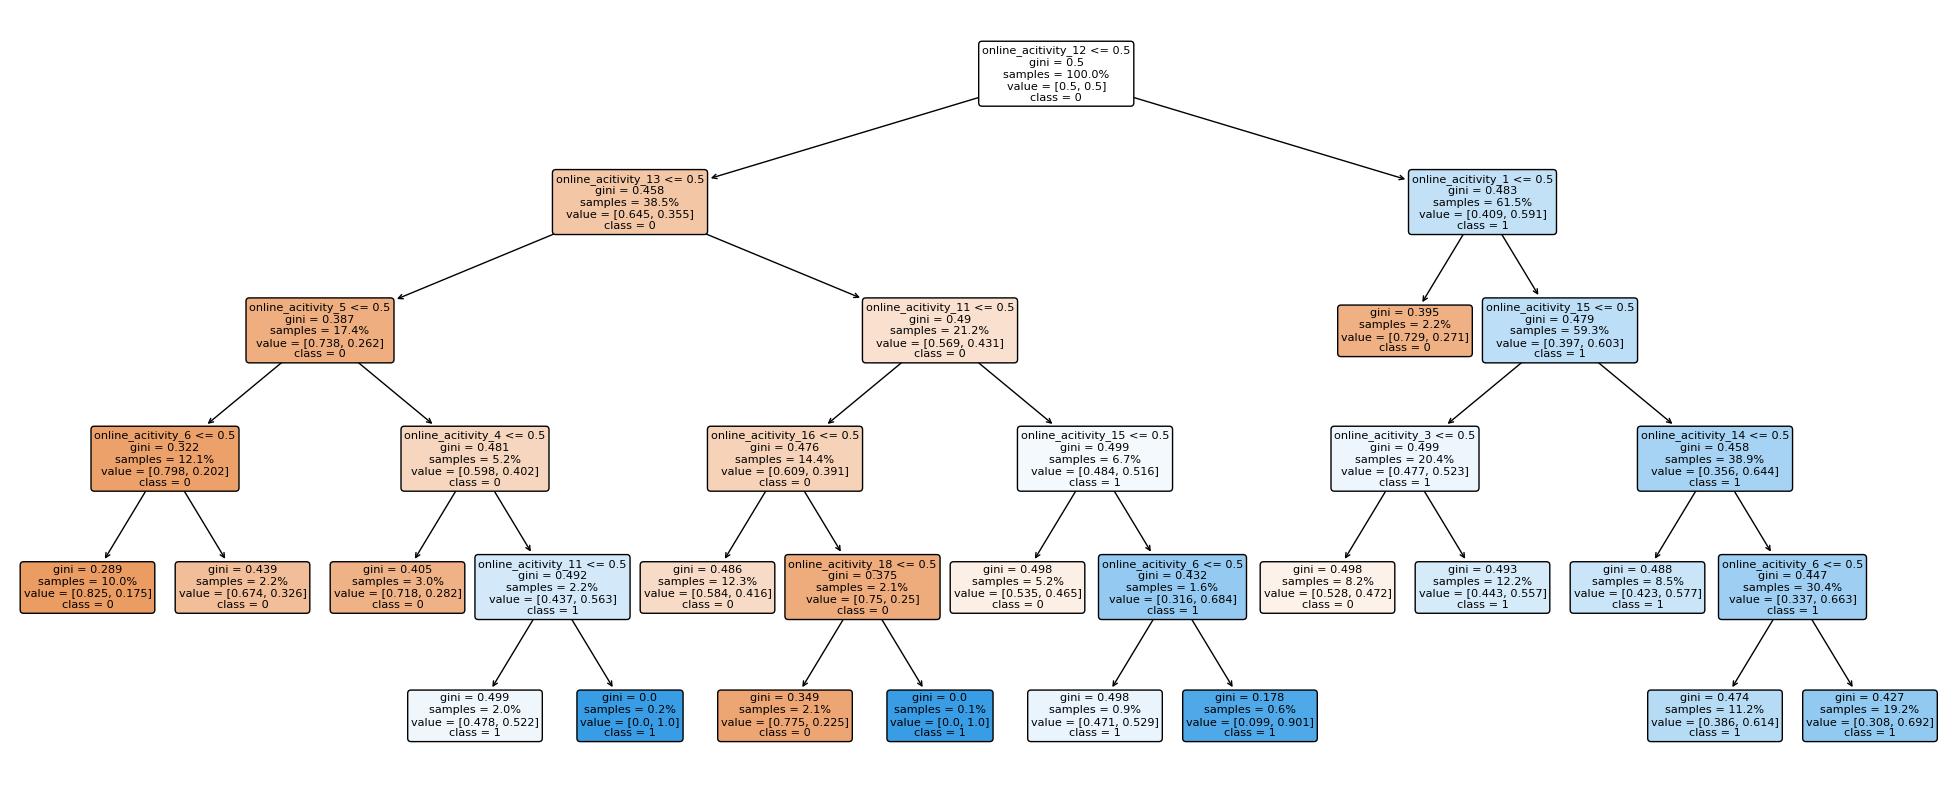

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# ฝึกโมเดล Decision Tree
tree_over = DecisionTreeClassifier(random_state=0, criterion='gini', max_depth=5, max_features=None, max_leaf_nodes=17, min_samples_leaf=1, min_samples_split=3)
tree_over.fit(X_train_over, y_train_over)


# สร้างรูปภาพของต้นไม้
plt.figure(figsize=(25,10))
plot_tree(tree_over, filled=True, feature_names=X_train_over.columns, class_names=['0', '1'], proportion=True, rounded=True)
plt.show()


In [29]:
# Perform predictions on the test set
y_pred = tree_over.predict(X_test_OU)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test_OU, y_pred)
precision = precision_score(y_test_OU, y_pred)
recall = recall_score(y_test_OU, y_pred)
f1 = f1_score(y_test_OU, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.6789838337182448
Precision: 0.0923185341789993
Recall: 0.5622317596566524
F1 Score: 0.1585956416464891


### Create model file

In [30]:
import joblib
from google.colab import files
# Save the model to a file
joblib.dump(tree_over, 'decision_tree_model.joblib')

# Download the model file to your local machine
files.download('decision_tree_model.joblib')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Neural Model

In [34]:
# 1. Data Preparation
X = data.drop(columns=['fake_news'])
y = data['fake_news']
# Assuming y is a pandas Series
y = y.replace({1: 0, 2: 1})

# 2. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Architecture
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer

# 4. Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5. Model Training
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# 6. Model Evaluation
y_pred = model.predict_classes(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

# Fitting model